<a href="https://colab.research.google.com/github/MohammadRezaTaheri03/code20/blob/master/ABC_MohammadrezaTaheri.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import_libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#load_Data
columns = ['Code item','Description item','Sep-17','Oct-17','Nov-17','Dec-17','Jan-18','Feb-18','Mar-18','Apr-18','May-18','Jun-18','Jul-18','Aug-18']

df = pd.read_excel('/content/ABC-Exercise.xlsx', header = 1 , names = columns)
df

,Code item,Description item,Sep-17,Oct-17,Nov-17,Dec-17,Jan-18,Feb-18,Mar-18,Apr-18,May-18,Jun-18,Jul-18,Aug-18
0,500001,Article 1,99200,94600,85200,50000,50000,90000,90000,70000,80000,80000,70000,70000
1,500002,Article 2,89200,73200,90000,112500,60000,90000,105000,90000,120000,105000,90000,90000
2,500003,Article 3,78800,84800,120000,90000,30000,50000,75000,100000,125000,100000,100000,100000
3,500004,Article 4,146600,108500,128600,120000,80000,80000,187500,250000,250000,250000,270000,270000
4,500005,Article 5,3000,600,0,0,0,0,0,0,50000,40000,40000,40000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,500384,Article 384,21600,3600,7400,19800,7200,13400,20800,10400,27400,16400,10000,10000
384,500385,Article 385,15400,8800,13300,27100,6300,9000,18600,14000,26000,18600,10000,10000
385,500386,Article 386,1666200,763900,1300000,2200000,900000,1400000,1700000,1400000,1400000,1419000,1419000,1419000
386,500387,Article 387,651000,322200,361200,750000,666000,377700,630000,666000,666000,666000,503500,503500


In [ ]:
df.info()

In [4]:
#creat AnnualTurnover$ column
df['Annual Turnover ($)'] = df['Sep-17'] + df['Oct-17'] + df['Nov-17'] + df['Dec-17'] + df['Jan-18'] + df['Feb-18'] + df['Mar-18'] + df['Apr-18'] + df['May-18'] + df['Jun-18'] + df['Jul-18'] + df['Aug-18']




#creat AnnualTurnover% column
total_Turnover = sum(df['Annual Turnover ($)'])

df['Annual Turnover (%)'] = df['Annual Turnover ($)'].apply(lambda x : x/total_Turnover*100)




#creat Stock Value Rank column
df['Stock Value Rank'] = df['Annual Turnover (%)'].rank(ascending = False)
df = df.sort_values(by = 'Stock Value Rank').reset_index()




#creat Cumulative(%) column
df['Cumulative(%)'] = df['Annual Turnover (%)'].cumsum()




#creat Class column
df['Class'] = df['Cumulative(%)'].apply(lambda x : "A" if x < 80  else ("C" if x >= 95 else "B"))



df

,index,Code item,Description item,Sep-17,Oct-17,Nov-17,Dec-17,Jan-18,Feb-18,Mar-18,Apr-18,May-18,Jun-18,Jul-18,Aug-18,Annual Turnover ($),Annual Turnover (%),Stock Value Rank,Cumulative(%),Class
0,385,500386,Article 386,1666200,763900,1300000,2200000,900000,1400000,1700000,1400000,1400000,1419000,1419000,1419000,16987100,4.615321,1.0,4.615321,A
1,32,500033,Article 33,841000,606400,926200,617500,929500,715000,682000,825000,858000,825000,0,0,7825600,2.126181,2.0,6.741503,A
2,387,500388,Article 388,971400,454800,481900,950000,375600,458300,720000,611000,708000,708000,611000,611000,7661000,2.081460,3.0,8.822963,A
3,59,500060,Article 60,758800,492800,1023300,682200,780000,600000,610000,800000,770000,810000,0,0,7327100,1.990741,4.0,10.813704,A
4,386,500387,Article 387,651000,322200,361200,750000,666000,377700,630000,666000,666000,666000,503500,503500,6763100,1.837505,5.0,12.651209,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,81,500082,Article 82,0,200,0,0,0,0,0,0,0,0,0,0,200,0.000054,386.0,99.999783,C
384,140,500141,Article 141,200,0,0,0,0,0,0,0,0,0,0,0,200,0.000054,386.0,99.999837,C
385,61,500062,Article 62,200,0,0,0,0,0,0,0,0,0,0,0,200,0.000054,386.0,99.999891,C
386,96,500097,Article 97,0,200,0,0,0,0,0,0,0,0,0,0,200,0.000054,386.0,99.999946,C


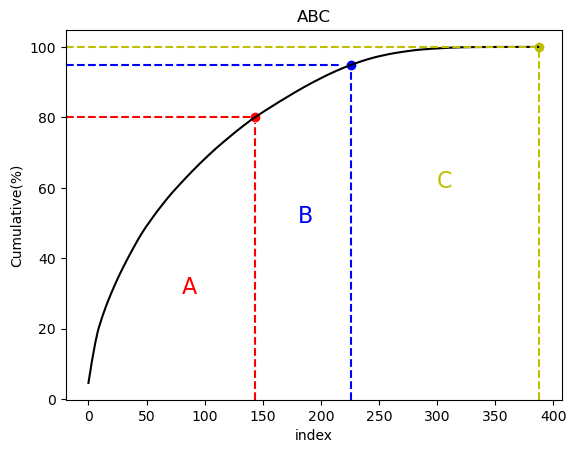

In [ ]:
#linear plot
min_x = min(df['index'])
max_x = max(df['index'])
x_sample = np.linspace(min_x,max_x,388)
plt.plot(x_sample , df['Cumulative(%)'] ,color = 'k' )


plt.scatter(143,80,color = 'red' , marker = 'o' , label='A')
plt.scatter(226,95,color = 'blue' , marker = 'o' , label='B')
plt.scatter(388,100,color = 'y' , marker = 'o' , label='C')
plt.axhline(y = 80 ,color = 'red' ,linestyle = '--' ,xmin=0, xmax=0.38)
plt.axvline(x = 143 ,color = 'red' ,linestyle = '--',ymin=0, ymax=0.75)
plt.axhline(y = 95 ,color = 'blue' ,linestyle = '--',xmin=0, xmax=0.55)
plt.axvline(x = 226 ,color = 'blue' ,linestyle = '--',ymin=0, ymax=0.9)
plt.axhline(y = 100 ,color = 'y' ,linestyle = '--' ,xmin=0, xmax=0.95)
plt.axvline(x = 388 ,color = 'y' ,linestyle = '--' ,ymin=0, ymax=0.95)
plt.text(80,30,'A',fontsize=16 ,color = 'r')
plt.text(180,50,'B',fontsize=16 ,color = 'b')
plt.text(300,60,'C',fontsize=16 ,color = 'y')


plt.title('ABC')
plt.xlabel('index')
plt.ylabel('Cumulative(%)')

plt.show()